## Soal 1 Waveform dan Spektogram Rekaman Suara 25 Detik

In [1]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import os
from pydub import AudioSegment
from pydub.playback import play

d:\Aa\Kuliah\Semester 6\Sistem Teknologi Multimedia R\IF4021-HO1\venv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


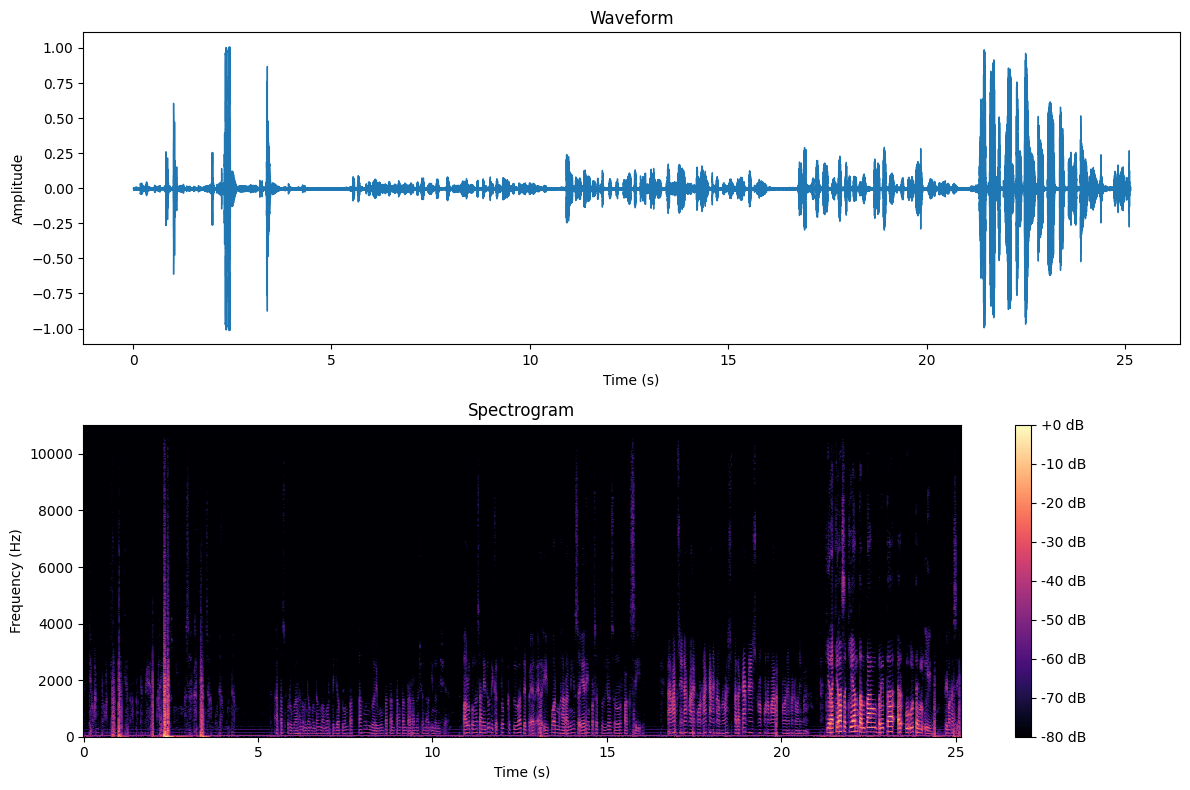

In [2]:
# Load the audio file
y, sr = librosa.load('file_suara/original.wav')

# Create a figure with two subplots
plt.figure(figsize=(12, 8))

# Plot waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot spectrogram
plt.subplot(2, 1, 2)
D = librosa.amplitude_to_db(abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

Dengan bantuan koding copilot, ditampilkan dua plot yaitu plot waveform dan plot spektogram. 

Pada plot waveform, pada 5 detik pertama saya merekam suara pelan, 5 detik kedua suara normal, 5 detik ketiga suara keras, 5 detik keempat suara cempreng, dan 5 detik kelima suara berteriak. 
- Bentuk gelombang suara pada 5 detik pertama terdapat titik yang tinggi pada amplitudenya, meski suara pelan, titik amplitude yang tinggi tersebut merupakan suara treble yang berfrekuensi tinggi, hal ini selaras pada spektogram pada 5 detik pertama. 
- Kemudian pada 5 detik kedua dan ketiga, yang membedakan hanya tinggi amplitude suara, di 5 detik suara kedua, suara normal, amplitudenya normal/sedang saja, sedangkan pada 5 detik ketiga, amplitudenya lebih tinggi sedikit karena kekuatan suaranya, di plot spektogram pun tidak jauh berbeda dengan waveform.
- Pada 5 detik keempat, suara cempreng memiliki amplitude yang lebih tinggi dari suara keras, karena suara cempreng mengeluarkan jenis suara yang berfrekuensi lebih tinggi juga.
- Pada 5 detik kelima, suara berteriak memiliki amplitude yang tinggi karena kerasnya suara, dan pada spektogram karena suara berteriak terdengar keras, frekuensi yang ditangkap memasuki frekuensi yang meninggi.

## Soal 2 Penerapan Teknik Fading pada Musik 30 Detik

In [3]:
# Muat file audio dari jalur tertentu
file_loc = os.path.join(os.getcwd(), 'file_suara', 'Gorillaz-FeelGoodInc.wav')
audio = AudioSegment.from_file(file_loc)

# Fungsi untuk menerapkan fading logaritmik
def logarithmic_fade(audio, fade_in=True, duration_ms=10000):
    steps = duration_ms // 10  # Setiap 10 ms langkah
    start_dB = -40.0 if fade_in else 0.0  # Mulai dari -40 dB untuk fade in
    end_dB = 0.0 if fade_in else -40.0  # Akhiri di 0 dB untuk fade in, atau turun ke -40 dB untuk fade out

    faded_audio = AudioSegment.silent(duration=0)  # Mulai dengan audio kosong

    for i in range(steps):
        volume_dB = start_dB + (end_dB - start_dB) * (1 - np.log10(i + 1) / np.log10(steps + 1))
        segment = audio[i * 10:(i + 1) * 10].apply_gain(volume_dB)  # Gunakan apply_gain() untuk perubahan volume
        faded_audio += segment  # Gabungkan setiap segmen audio

    return faded_audio

# Terapkan fade bawaan untuk perbandingan
faded_in_audio_builtin = audio.fade_in(10000)
faded_out_audio_builtin = audio.fade_out(10000)

# Terapkan fade logaritmik
faded_in_audio_log = logarithmic_fade(audio, fade_in=True, duration_ms=10000)
faded_out_audio_log = logarithmic_fade(audio, fade_in=False, duration_ms=10000)

# Tentukan jalur direktori untuk menyimpan file output
output_dir = os.path.join(os.getcwd(), 'file_suara_output')
os.makedirs(output_dir, exist_ok=True)

# Simpan hasilnya
faded_in_audio_builtin.export(os.path.join(output_dir, 'faded_in_builtin.wav'), format="wav")
faded_out_audio_builtin.export(os.path.join(output_dir, 'faded_out_builtin.wav'), format="wav")
faded_in_audio_log.export(os.path.join(output_dir, 'faded_in_logarithmic.wav'), format="wav")
faded_out_audio_log.export(os.path.join(output_dir, 'faded_out_logarithmic.wav'), format="wav")

<_io.BufferedRandom name='d:\\Aa\\Kuliah\\Semester 6\\Sistem Teknologi Multimedia R\\IF4021-HO1\\file_suara_output\\faded_out_logarithmic.wav'>

## Soal 3 Equalizer

### Berikut Filter High-Pass pada Lagu Feel Good Inc by Gorillaz

In [2]:
import wave
import os
import librosa
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

file_loc = os.path.join(os.getcwd(), 'file_suara', 'suara_tugas3.wav')
# Load audio with the original sampling rate
y, sr = librosa.load(file_loc, sr=None)
print(f"Sampling Rate: {sr}")

Sampling Rate: 44100


In [3]:
def high_pass_filter(audio_data, sr, cutoff=1000):    
    # mendesain filter
    b, a = signal.butter(2, cutoff, btype='high', fs=sr, output='ba')
    # menerapkan filter
    filtered_audio = signal.lfilter(b, a, audio_data)
    
    return filtered_audio

# Apply high pass filter to the audio
hpassed_audio = high_pass_filter(y, sr, cutoff=400)

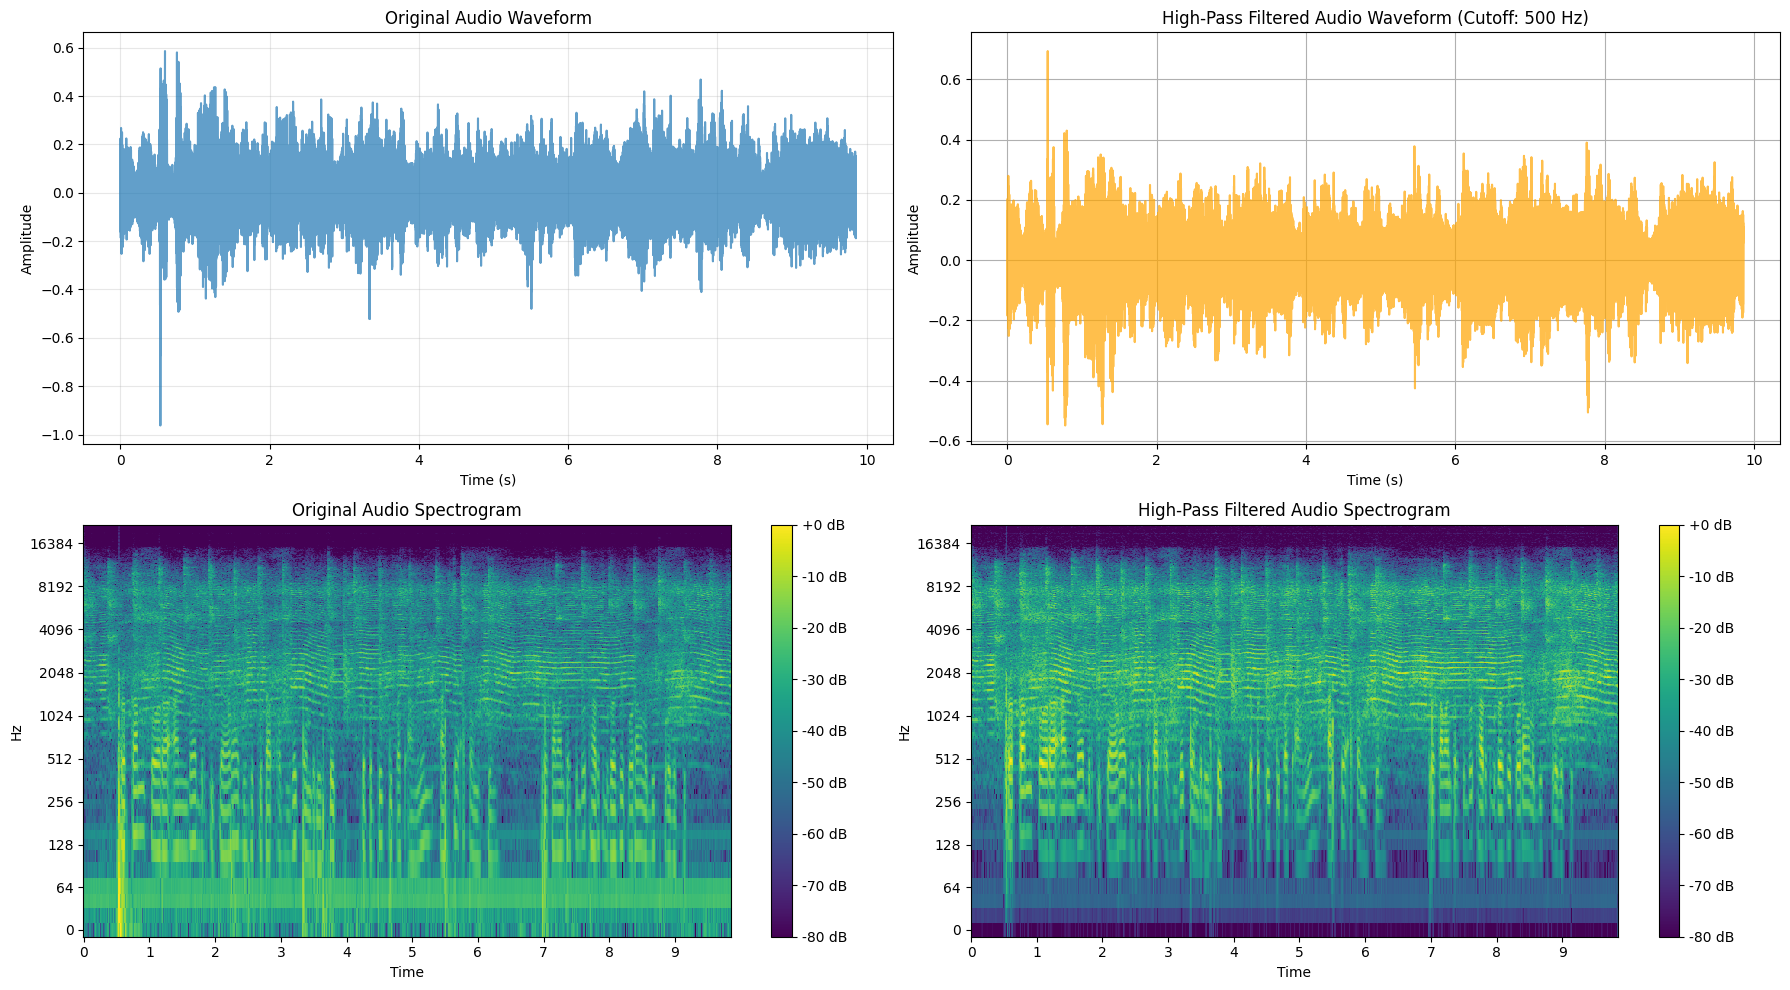

In [4]:
# Visualize the original and high-pass filtered audio
plt.figure(figsize=(18, 10))

# Time axis for plotting
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot the waveform comparison
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original', alpha=0.7)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis, hpassed_audio, label='High-Pass Filtered', color='orange', alpha=0.7)
plt.title('High-Pass Filtered Audio Waveform (Cutoff: 500 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=1)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the high-pass filtered audio
plt.subplot(2, 2, 4)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(hpassed_audio)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('High-Pass Filtered Audio Spectrogram')

plt.tight_layout()
plt.show()

In [5]:
# Save the filtered audio
output_path = os.path.join('file_suara_output', 'high_pass_filtered.wav')
sf.write(output_path, hpassed_audio, sr)
print(f"Filtered audio saved to {output_path}")

Filtered audio saved to file_suara_output\high_pass_filtered.wav


### Berikut Filter Low-Passnya

In [19]:
def low_pass_filter(audio_data, sr, cutoff=2000):    
    b, a = signal.butter(2, cutoff, btype='low', fs=sr, output='ba')
    filtered_audio = signal.lfilter(b, a, audio_data)
    
    return filtered_audio

# Apply low pass filter to the audio
lpassed_audio = low_pass_filter(y, sr, cutoff=500)

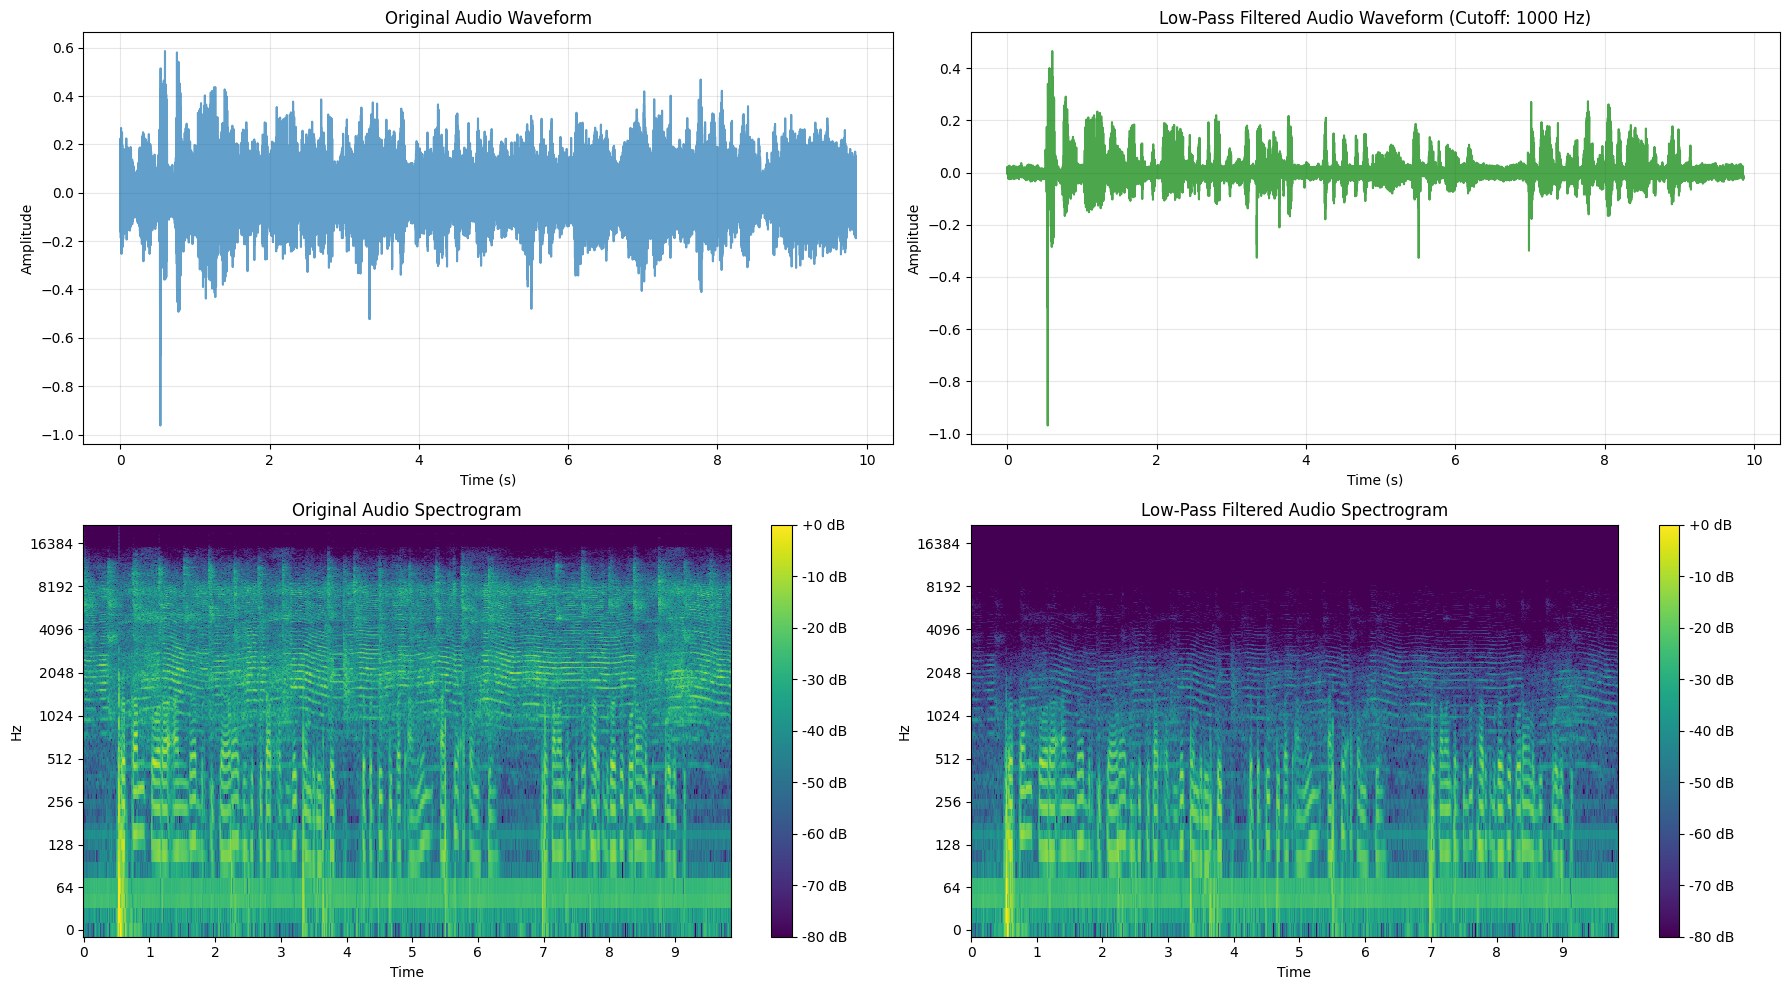

In [20]:
# Visualize the original and low-pass filtered audio
plt.figure(figsize=(18, 10))

# Time axis for plotting
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot the waveform comparison
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original', alpha=0.7)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis, lpassed_audio, label='Low-Pass Filtered', color='green', alpha=0.7)
plt.title('Low-Pass Filtered Audio Waveform (Cutoff: 1000 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the low-pass filtered audio
plt.subplot(2, 2, 4)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(lpassed_audio)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Low-Pass Filtered Audio Spectrogram')

plt.tight_layout()
plt.show()

In [21]:
# Save the low-pass filtered audio
output_path = os.path.join('file_suara_output', 'low_pass_filtered.wav')

sf.write(output_path, lpassed_audio, sr)
print(f"Low-pass filtered audio saved to {output_path}")

Low-pass filtered audio saved to file_suara_output\low_pass_filtered.wav


### Berikut Filter Band-Pass:

In [43]:
def band_pass_filter(audio_data, sr, lowcut=500, highcut=2000):
    
    # Create a bandpass Butterworth filter
    b, a = signal.butter(2, [lowcut, highcut], btype='band', fs=sr, output='ba')
    
    # Apply the filter
    filtered_audio = signal.lfilter(b, a, audio_data)
    
    return filtered_audio

# Apply band pass filter to the audio
bpassed_audio = band_pass_filter(y, sr, lowcut=250, highcut=600)

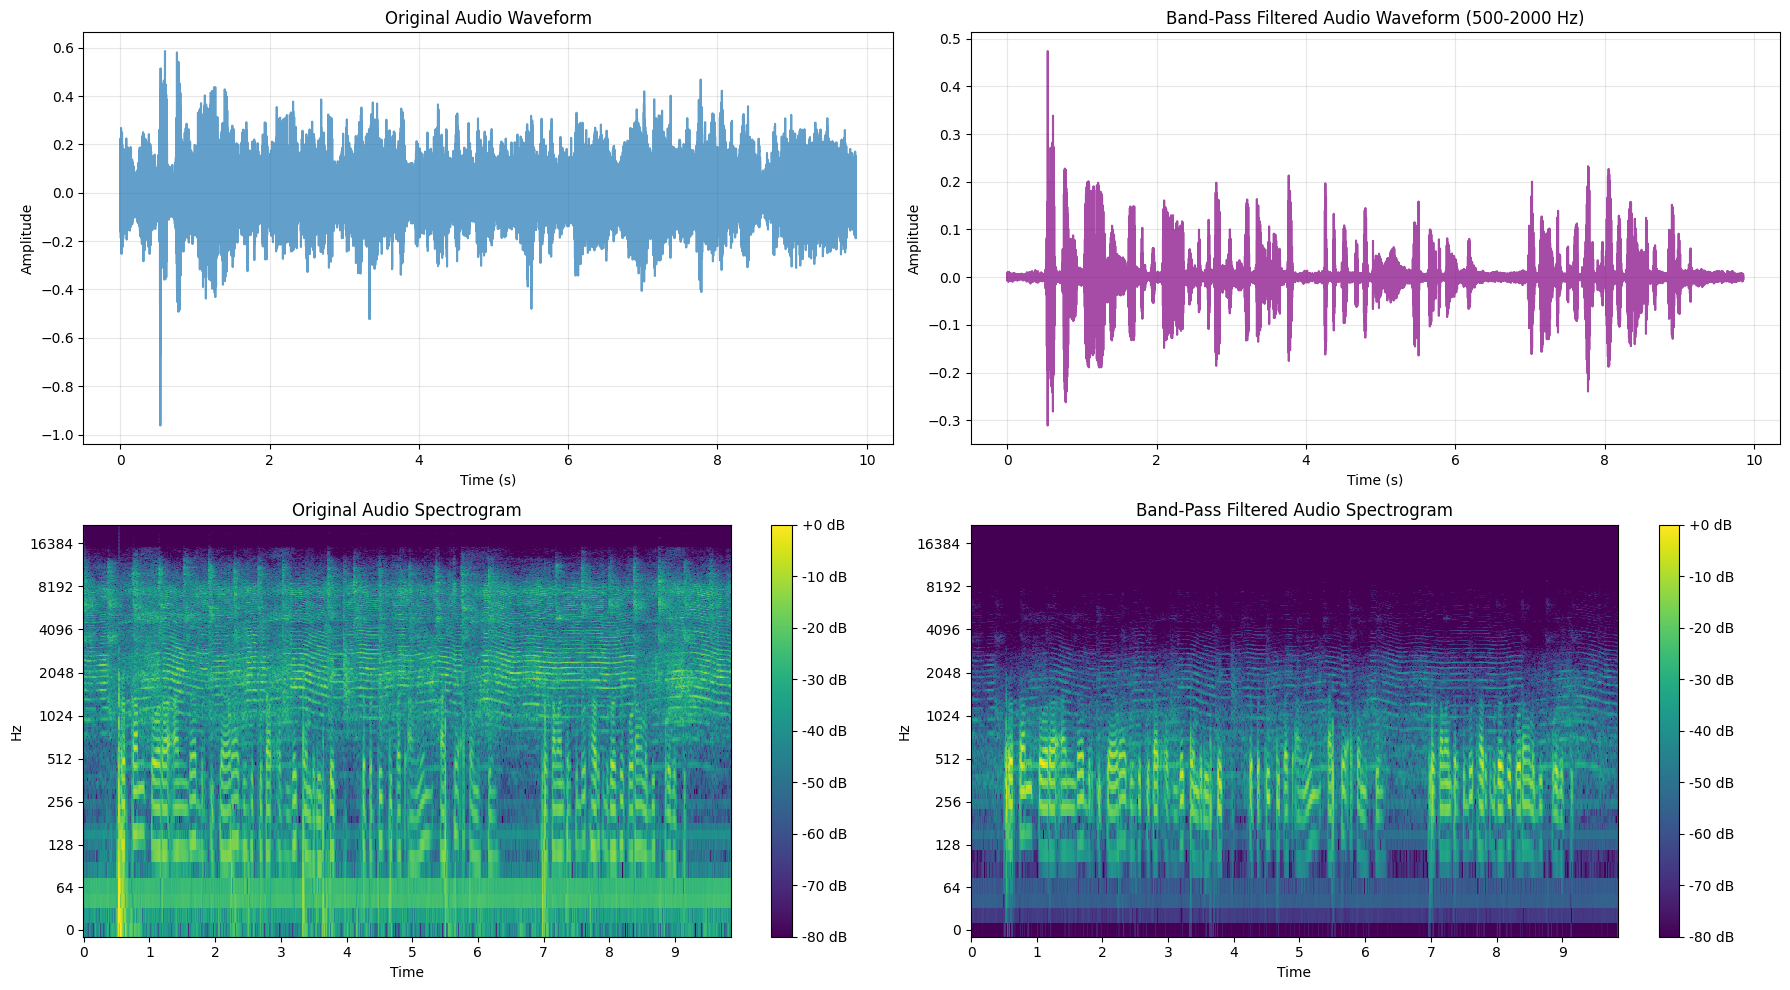

In [44]:
# Visualize the original and band-pass filtered audio
plt.figure(figsize=(18, 10))

# Plot the waveform comparison
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original', alpha=0.7)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis, bpassed_audio, label='Band-Pass Filtered', color='purple', alpha=0.7)
plt.title('Band-Pass Filtered Audio Waveform (500-2000 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the band-pass filtered audio
plt.subplot(2, 2, 4)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(bpassed_audio)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Band-Pass Filtered Audio Spectrogram')

plt.tight_layout()
plt.show()

In [45]:
# Save the band-pass filtered audio
output_path = os.path.join('file_suara_output', 'band_pass_filtered.wav')
sf.write(output_path, bpassed_audio, sr)

### Dari tiga filter cut yang saya gunakan dari kodingan modul (High-Pass, Low-Pass, dan Band-Pass), didapatkan tiga output suara hasil dari filter.
- Pada output wav dari High-Pass, suara bass sebelumnya menghilang dari file wav yang original. Saya menggunakan threshold cutoff=1000 (belum diubah dari modul) dan cutoff pada frekuensi 400. Suara bass hilang, vokal terdengar sedikit tidak berisi atau tidak terlalu berat, dan suara noise terdengar jelas.

- Pada output wav dari Low-Pass, suara noise sedikit menghilang meski masih terdengar. Saya menggunakan threshold cutoff=2000 dan cutoff pada frekuensi 500 agar frekuensi yang difilter dapat divariasikan. Suara noise memudar dan masih terdengar meski tidak sebising suara asli, suara vokal terdengar lebih jernih, dan suara bass terdengar lebih jelas.

- Pada output wav dari Band-Pass, suara dapat diatur dimana suara frekuensi tinggi dan rendah dipotong sehingga noise dan bass dapat dibersihkan dan suara vokal bisa terdengar lebih jelas. Saya menggunakan threshold lowcut=500 dan highcut=2000, lalu lowcut di frekuensi 250 dan highcut di frekuensi 600. Suara bass difilter sedikit, suara noise sudah cukup hilang meski masih terdengar, dan suara vokal terpotong sedikit karena noise dan vokal kemungkinan berada di frekuensi yang berdekatan sehingga ketika noise berusaha untuk dipotong, vokal juga ikut dikorbankan.

### Jelaskan Noise yang muncul pada rekaman anda:
- Noise yang saya gunakan pada rekaman suara saya, yaitu menggunakan suara dari youtube '[ASMR] 1 JAM Tentangga Renov Rumah (suara palu, aduk cement, gerinda, potong keramik, dll)', berikut link youtubenya: https://www.youtube.com/watch?v=Sv5_0xrkvQY&t=80s&pp=ygUJa3VsaSBhc21y
### Filter mana yang paling efektif untuk mengurangi noise tersebut:
- Band-Pass karena dapat mengatur bass dan treble atau noise dari rekaman suara tersebut, jika kita menginginkan suara vokal yang lebih jelas.
### Nilai cutoff yang memberikan hasil terbaik
- Lowcut dimulai di frekuensi 250.
- Highcut dimulai di frekuensi 600.
- Karena suara vokal manusia (berdasarkan frekuensi spektogram di atas) berada pada frekuensi 256 sampai 512 sehingga dapat kita cutoff menyisakan frekuensi tersebut.
### Bagaimana kualitas suara (kejelasan ucapan) setelah proses filtering
- Kualitas suara setelah proses filtering menurut saya menurun, karena noise yang saya gunakan memiliki frekuensi treble yang mirip atau mendekati frekuensi vokal saya sehingga sama-sama terpotong yang membuat kualitas suara menjadi kurang jelas.

## Soal 4 Pitch Shifting

In [50]:
import wave
import os
import librosa
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

file_loc = os.path.join(os.getcwd(), 'file_suara', 'original.wav')
# Load audio with the original sampling rate
y, sr = librosa.load(file_loc, sr=None)
print(f"Sampling Rate: {sr}")

Sampling Rate: 44100


In [51]:
# Define a function to create a chipmunk effect
def create_chipmunk_voice(audio_data, sr, pitch_steps=7):
    # Using librosa's pitch_shift function
    chipmunk_audio = librosa.effects.pitch_shift(
        audio_data, 
        sr=sr, 
        n_steps=pitch_steps,
        bins_per_octave=12
    )
    return chipmunk_audio

# Apply chipmunk effect (higher pitch)
chipmunk_voice = create_chipmunk_voice(y, sr, pitch_steps=12)

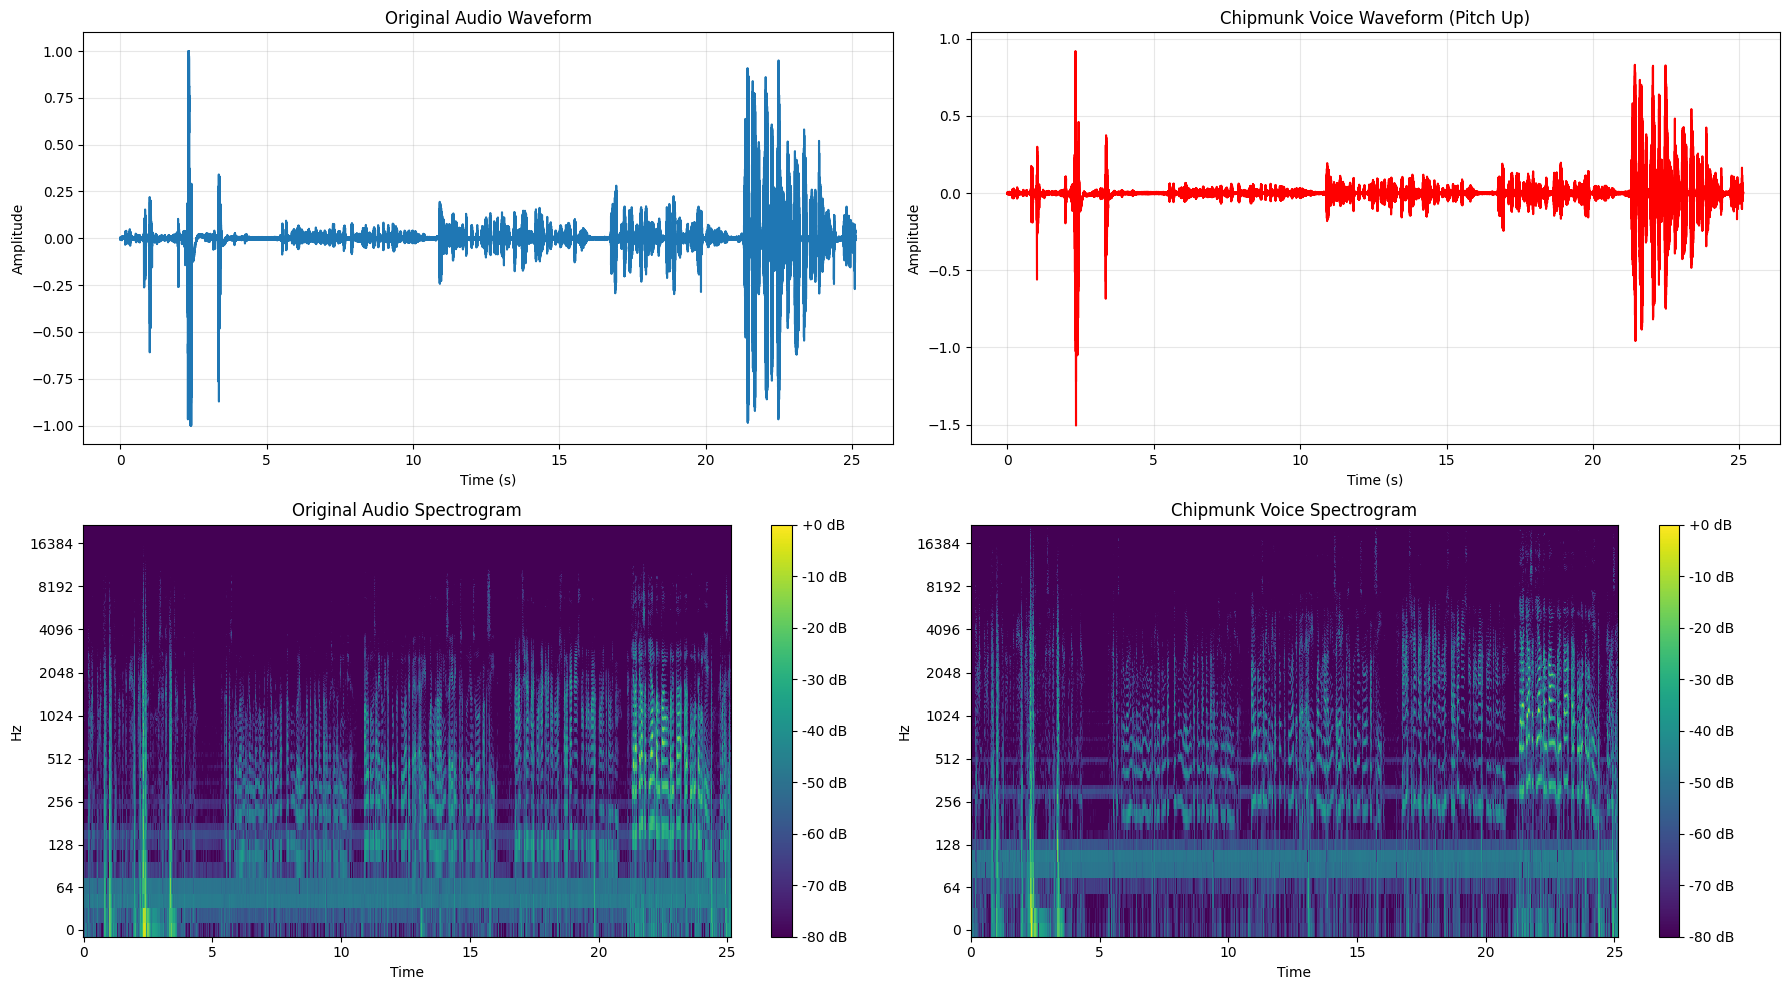

In [52]:
# Visualize the original and pitch-shifted audio
plt.figure(figsize=(18, 10))

# Create a new time axis for the current audio file
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot waveforms
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original')
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis[:len(chipmunk_voice)], chipmunk_voice, label='Chipmunk Voice', color='red')
plt.title('Chipmunk Voice Waveform (Pitch Up)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the chipmunk voice
plt.subplot(2, 2, 4)
D_chipmunk = librosa.amplitude_to_db(np.abs(librosa.stft(chipmunk_voice)), ref=np.max)
librosa.display.specshow(D_chipmunk, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Chipmunk Voice Spectrogram')

plt.tight_layout()
plt.show()

In [53]:
# Save the chipmunk voice audio
output_path = os.path.join('file_suara_output', 'chipmunk_voice.wav')
sf.write(output_path, chipmunk_voice, sr)
print(f"Chipmunk voice saved to {output_path}")

Chipmunk voice saved to file_suara_output\chipmunk_voice.wav


### Jelaskan proses pitch shifting yang anda lakukan:
- Parameter yang digunakan
- Perbedaaan dalam representasi visual antara suara asli dan suara yang telah dimodifikasi
- Bagaimana perubahan pitch memengaruhi kualitas dan kejelasan suara.

### Gunakan dua buah pitch tinggi, misalnya pitch +7 dan pitch +12

### Gabungkan kedua rekaman yang telah di-pitch shift ke dalam satu file audio